In [8]:
import re
import pickle
import stemmer
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

fp = open("/home/pranav/data.txt","r")
with open('stop_words.pickle', 'rb') as handle:
    stop_words = pickle.load(handle)

stemmer = stemmer.Stemmer('english')    
paragraphs = fp.readlines()

In [99]:
words = []
lines = []
dictionary = {}
keywords = set()

def add_to_dictionary(word):
    if word not in stop_words:
        keywords.add(stemmer.stemWord(word))
    if word in dictionary:
        dictionary[stemmer.stemWord(word)] += 1
    else :
        dictionary[stemmer.stemWord(word)] = 1    

def process_word(word):
    number = re.search("(^[\d]+)|($[\d]+)", word)
    if number is None or len(number.group()) != len(word):
        if re.search("(www\.)|([\S]+\@)([\S]+\.[\S]+)", word) is None:
            word = word.replace(".","")   
        add_to_dictionary(word.lower())        
        
def process_line(line):
    global words 
    pattern = r'[\w][\S]*[\w]'
    word_list = re.findall(pattern, line)
    words = words + word_list
    for word in word_list:
        process_word(word)

def get_lines(para):
    pattern = "[\.|\?\!] "
    splitter = re.compile(pattern)
    return splitter.split(para);

def process_paragraph(paras):
    global lines
    for para in paras:
        para = para.strip()
        para = re.sub("\n","",para)
        lines =lines + [line for line in get_lines(para) if line.strip()!=""]
    for line in lines:
        process_line(line)

def perc(a1,a2):
    return (a1/a2)*100

def pie_plotter():
    global words
    labels = 'Keywords', 'Stop-words', 'Repeats'
    sizes = [perc(len(keywords),len(words)), perc((len(dictionary) - len(keywords)),len(words)),perc((len(words) - len(dictionary)),len(words))]
    explode = (0.1, 0.2, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()  

def bar_plotter():
    labels = []
    freq = []
    for word in keywords:
        if dictionary[word]>=5:
            labels.append(word)
            freq.append(dictionary[word])
    plt.bar(range(len(freq)), freq)
    plt.xticks(range(len(freq)), labels, rotation = "vertical")
    plt.gcf().set_size_inches(18.5,10.5)
    plt.show()

In [100]:
process_paragraph(paragraphs)


####################################################################################

The number of paragraphs is  46 

The number of sentences is  137 

The number of words is  2953 

Total no. of words in vocabulary is  969 

Total no. of stop words in vocabulary is  969 

The number of keywords in vocabulary is  849 


####################################################################################



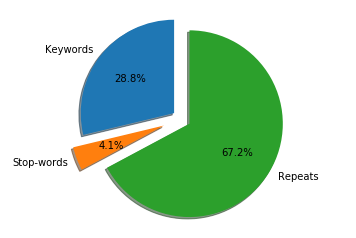

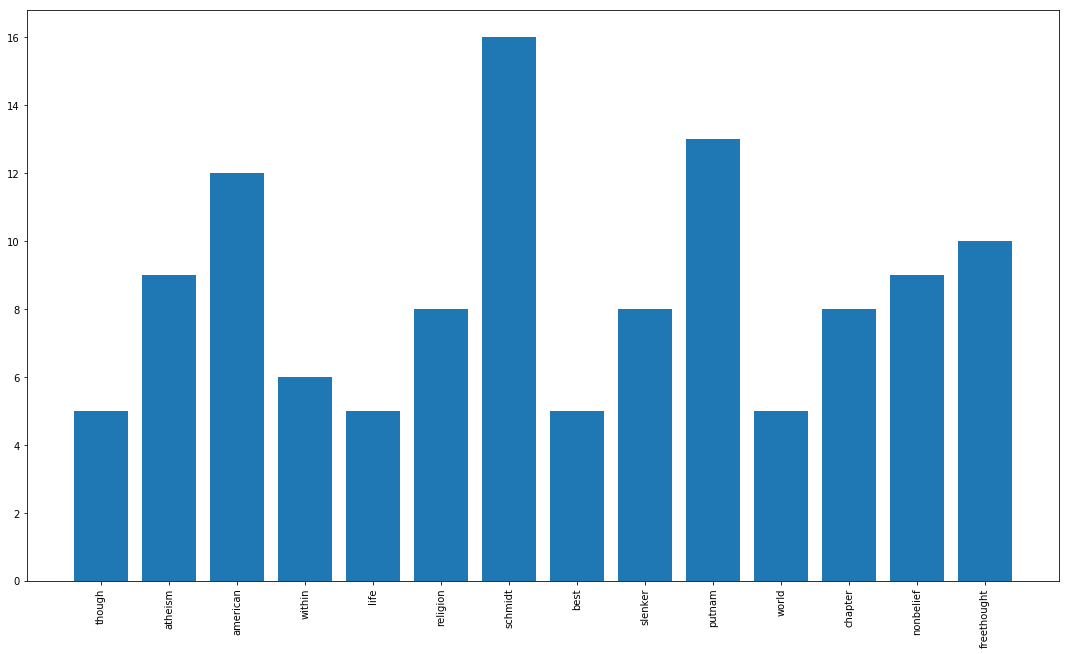


####################################################################################

                           the  :  164
                            of  :  120
                           and  :  100
                            in  :  64
                            to  :  59
                            is  :  33
                          that  :  32
                           for  :  29
                            as  :  29
                            on  :  27
                          they  :  22
                           are  :  21
                         their  :  21
                            we  :  20
                            an  :  20
                          from  :  17
                          like  :  17
                          this  :  16
                       schmidt  :  16
                            do  :  14
                           who  :  14
                            if  :  14
                          what  :  13
                          with  :  1

                     enlighten  :  1
                         broad  :  1
                          such  :  1
                       descart  :  1
                          hume  :  1
                          kant  :  1
                        school  :  1
                          rome  :  1
                      catherin  :  1
                        wilson  :  1
                         shown  :  1
                      influenc  :  1
                    understudi  :  1
                   understate3  :  1
                        pulitz  :  1
                     prize–win  :  1
                    shakespear  :  1
                       stephen  :  1
                    greenblatt  :  1
                     page-turn  :  1
                       renaiss  :  1
                        recept  :  1
                          text  :  1
                    lucretius’  :  1
                         latin  :  1
                       things4  :  1
                      recoveri  :  1
 

In [101]:
print ("\n####################################################################################\n")
print ("The number of paragraphs is ", len(paragraphs),"\n")
print ("The number of sentences is ", len(lines),"\n")
print ("The number of words is ", len(words),"\n")
print ("Total no. of words in vocabulary is ", len(dictionary), "\n")
print ("Total no. of stop words in vocabulary is ", len(dictionary), "\n")
print ("The number of keywords in vocabulary is ", len(keywords), "\n") 
print ("\n####################################################################################\n")
plotter()
bar_plotter()
print ("\n####################################################################################\n")
for k,v in sorted(dictionary.items(), key=lambda p:p[1], reverse=True):
    print(k.rjust(30), " : ", v)
    